Viewing on Github? View this notebook in [Jupyter Notebook Viewer](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/nena_corpus/blob/master/analyses/query_experiments.ipynb) for pretty HTML rendering.

# Query Experiments

This notebook will explore the new NENA corpus using the proto-type TF resource and the corresponding TF NENA app. A key objective is to test morphology querying against the `utf8`, `trans_full`, and `trans_lite` features. These are features stored on char, morpheme, and word objects in the database.

In [2]:
import collections
import re
from tf.app import use # Text-Fabric app for corpus interactions and querying

## Invoke the TF app

Text-Fabric provides a simple interface for calling forth the dataset, via an "app." An app makes available a full TF api that can be used to navigate the corpus. It also provides visual representations of the corpus objects in the form of HTML that is inserted into the IPython display. 

We import the NENA corpus now by invoking the tf.app interface. Note that with the app, feature loading is automatic—there is no need to explicitly load features as they are loaded as needed.

In [3]:
nena = use('nena:hot') # :hot to retrieve the latest TF files from Github

# Make shortform TF methods available
F, T, L = nena.api.F, nena.api.T, nena.api.L

	connecting to online GitHub repo annotation/app-nena ... connected
Using TF-app in /Users/cody/text-fabric-data/annotation/app-nena/code:
	#15587f6e3312fe697482a3177c36afe84247148b (latest commit)
	connecting to online GitHub repo CambridgeSemiticsLab/nena_corpus ... connected
	no releases
	no releases
	tf/dialect.tf...downloaded
	tf/filename.tf...downloaded
	tf/informant.tf...downloaded
	tf/language.tf...downloaded
	tf/line.tf...downloaded
	tf/oslots.tf...downloaded
	tf/otext.tf...downloaded
	tf/otype.tf...downloaded
	tf/paragraph.tf...downloaded
	tf/place.tf...downloaded
	tf/text_id.tf...downloaded
	tf/title.tf...downloaded
	tf/trailer.tf...downloaded
	tf/trans_full.tf...downloaded
	tf/trans_lite.tf...downloaded
	tf/utf8.tf...downloaded
	OK
Using data in /Users/cody/text-fabric-data/CambridgeSemiticsLab/nena_corpus/tf:
	#d527b269e0ff49aee6f1ce4db05be057e72ba1e6 (latest commit)
   |     0.00s No structure info in otext, the structure part of the T-API cannot be used


   |      |     0.01s c __sections__         WARNING:    1 x section line without containing text


# Basics

A Text-Fabric resource is an implied graph, wherein all objects are represented as nodes with unique identifiers. In TF, a node is identified with a simple integer. Node numbers are assigned to any linguistic unit (sometimes called an "object" in a non-Pythonic sense) that is to be modeled in the database. Features, either strings or integers, can then be linked to those node numbers. 

Node number assignment begins with the most atomic unit in the corpus. In some corpora, the smallest unit that is modeled is a word. In the NENA corpus, we begin with characters. The "atomic unit" is called a slot. Slots possess a special role in a TF dataset. Slots are used to calculate node adjacency and embeddings in the text. When node numbers are assigned to slots, the counting begins at 1 and extends all the way up to the last node in the corpus. Below we assign `first_node` to `1` since that is the first slot/node in the corpus.

In [4]:
first_node = 1 # the first char (character) in the nena corpus

This node has features associated with it. One of the most important features is the `utf8` and transcription representations (`trans_full` and `trans_lite`). Those features tell us what the node looks like. They can be called with the Text-Fabric `F` method ("feature"). The method has a subclass that matches the feature name in question. For example: `F.utf8` is the feature (`F`) lookup object followed by the feature class utf8 (`.utf8`). The node's corresponding value in that feature class can be obtained by called `.v` (for value) on the `F.utf8` object. An example is provided below for the `utf8`, `trans_full`, and `trans_lite` features.

In [5]:
print(F.utf8.v(first_node))
print(F.trans_full.v(first_node))
print(F.trans_lite.v(first_node))

ʾ
}
}


## Node Containment

Embedding is key to understanding language units. Morphemes are composed of letters; words of morphemes; sentences of words; etc. In a TF dataset, this embedding information is fundamentally expressed via the slots. In the NENA corpus, that is the `char` node type. We define a word as a span of characters. To find out what word a given char belongs to, we can use the `L` class ("Level"). `L.u` will "look a Level Up". 

We can find the node number that belongs to node `1` with the `L.u` class, as below:

In [6]:
first_word = L.u(first_node, 'word')

print(first_word)

(631443,)


In [7]:
first_word = first_word[0]

Note that the `L` class returns tuples. This is because containment is often plural. For example, if we take the `first_word` node and call the `L.d` class, we can obtain a tuple of all characters contained within it:

In [8]:
L.d(first_word, 'char')

(1, 2, 3, 4, 5)

## Fast Text-Handling

Looking at the surface text of nodes in TF is an important part of understanding the data. The `T` class provides fast text-handling that quickly formats text representations of all levels of objects. Unlike the `utf8` and `trans` features, which are only valid for char, morpheme, and word nodes, the `T` class can be called on high-level nodes such as sentences. That is demonstrated below.

In [9]:
first_sentence = L.u(first_word, 'sentence')[0]

print(T.text(first_sentence))

ʾìθwaˈ xa-ràbbən,ˈ tíwɛwa gu-xa-gəppìθa.ˈ 


Another benefit of the `T` class is that one can request other kinds of formats. A format is requested with a standard format string separated with a hyphen. The convention is described in the TF documentation [here](https://annotation.github.io/text-fabric/Api/Text/#text-representation).

In short, the default format is

> text-orig-full

Another format is a transcription type such as:

> text-trans-full

This ^ format is constructed using the `trans_full` feature. A similar format without vowel accentuation is found in:

> text-trans-plain

which is constructed via the feature `trans_lite`. 

The full set of available formats in the corpus can be seen with a `T.formats` call:

In [10]:
T.formats

{'text-orig-full': 'char',
 'text-trans-full': 'char',
 'text-trans-plain': 'char'}

The formats are illustrated below using the first sentence:

In [11]:
show_formats = ('text-trans-full', 'text-trans-plain')

for form in show_formats:
    print(form)
    print('\t', T.text(first_sentence, fmt=form))
    print()

text-trans-full
	 }i`8waˈ xa-ra`bb3n,ˈ ti'w$wa gu-xa-g3ppi`8a.ˈ 

text-trans-plain
	 }i8waˈ xa-rabb3n,ˈ tiwewa gu-xa-g3ppi8a.ˈ 



Note that the spacing, punctuation, and ending prosaic accent markers are not part of the `trans_full` and `trans_lite` feature. Rather they are from the `trailer` feature and are inserted since the formats are defined as consisting of `{trans}{trailer}`. This ensures proper punctuation when printing large portions of transcribed texts. This situation is not ideal, however, since some transcribed characters do consist of punctuators like `!` or `.`. For this reason, we should consider introducing a `trailer_trans` feature for large `T.text` prints. However, for the vast majority of use-cases this situation presents no problem.

## Pretty Representations

Equally important to the analysis process as looking at raw text is looking at the contextual embedding of objects. A lot of Python work can be saved with the TF app `pretty` and `show` functions. These special representations are made available via the nena app, in this case instantiated as `nena`.

In [12]:
nena.pretty(first_word)

In [13]:
nena.pretty(first_sentence)

The prosaic boundaries of the sentence are highlighted via the dotted-red line.

Sometimes it's necessary to have the node numbers of contained objects for further investigation. That can be acheived by toggling `withNodes=True`:

In [14]:
nena.pretty(first_sentence, withNodes=True)

The NENA corpus also has char and morpheme objects, which the `.pretty` function handles differently when asked. In order to see all of that detail, you can say `showMicro=True`:

In [15]:
nena.pretty(first_sentence, showMicro=True)

And to be very specific:

In [16]:
nena.pretty(first_sentence, showMicro=True, withNodes=True)

And f we want to see a particular feature displayed along with the constextual data, we can say `extraFeatures`:

In [17]:
nena.pretty(first_sentence, withNodes=True, extraFeatures={'otype'})

**All of the available display options can be seen in the TF documentation [here](https://annotation.github.io/text-fabric/Api/App/#display).**

The `.show` method is very useful for displaying a list of nodes. Those nodes must be packaged in a tuple. `.show` highlights the nodes in question when supplied this data.

In [18]:
show_me = [(first_sentence, first_word)] # NB list of tuples

nena.show(show_me)

#### Querying with .show

The results of a query can be fed to a `.show` method in order to visualize a host of results. The `nena.search` method provides functionality equivalent with [the standard TF `S.search` class](https://annotation.github.io/text-fabric/Api/Search/), with some minor differences such as results reporting. 

An example of `nena.search` used in concert with `nena.show` is provided below. We find cases of words that begin with `ʾìθ` using the `trans_lite` feature, which ignores vowel accentuation. Note that the `~` operator in the search template (`trans_lite~`) specifies a regular expression search.

In [19]:
query = '''

word trans_lite~^}i8w

'''

results = nena.search(query)

  0.14s 130 results


In [20]:
nena.show(results, end=5) # end= to only show N results

# Verb Searching

I want to try some prototype queries for identifying verb morphology in the corpus. Namely, I will attempt to identify verbs in the Barwar corpus. For this, I will use a combination of searching and displaying like that which was illustrated above.

#### Barwar, verbs, S-suffixes

6.2.1. 3ms.  -∅  
6.2.2. 3fs.  -a  
6.2.3. 3pl.  -i  
6.2.4. 2ms.  default: -ət long: -eti  
6.2.5. 2fs.  default: -ət long: -ati  
6.2.6. 2pl.  -itu  
6.2.7. 1ms.  default: -ən long: -ena  
6.2.8. 1fs.  default: -ən long: -ana  
6.2.9. 1pl.  default: -əx long: -exi

#### Barwar, verbs, L-suffixes

6.3. L-suffixes  +
6.3.1. 3ms.  -le  
6.3.2. 3fs.  -la  
6.3.3. 3pl.  default: -lɛ 
-la long: -ley 
-lay  
6.3.4. 2ms.  -lux  
6.3.5. 2fs.  -ləx  
6.3.6. 2pl.  -lɛxu  
6.3.7. 1s.  -li  
6.3.8. 1pl.  default: -lən long: -lɛni

### Attempt to Find L-Suffixed Verbs

The L suffixes seem fairly distinctive. Can we find them with a simple regex pattern search?

In [21]:
verbs = nena.search('''

dialect dialect=Barwar
    word trans_lite~.le$|.la$|.ley$|.lux$|.l3x$|.l3xu$|.li$|.l3n$

''')

nena.show(verbs, suppress='trans_lite', end=25)

XXXX (True, frozenset({'Barwar'}))
  0.18s 10423 results


### Noun Searches

#### Barwar, Plural Nouns

Plural noun endings include:

1. -e
2. -ane
3. -wa8a
4. -ya8a

The `-e` ending is probably not very distinctive. How about the others?

In [22]:
nouns = nena.search('''

dialect dialect=Barwar
    word trans_lite~ane$|wa8a$|ya8a$

''')

XXXX (True, frozenset({'Barwar'}))
  0.15s 407 results


In [23]:
nena.show(nouns, end=25, suppress='trans_lite')

### An attempt at plural nouns with -e

We define a pattern that excludes -le verb endings.

In [24]:
pl_e = nena.search('''

dialect dialect=Barwar
    word trans_lite~(?<!l)e$

''')


XXXX (True, frozenset({'Barwar'}))
  0.19s 6430 results


In [49]:
nena.show(pl_e, end=10)

### Plural Verb AND Plural Noun Search

Can we identify casese where a plural noun is likely to serve as a subject to a plural verb within a sentence?

In [26]:
fem_plurals = nena.search('''

dialect dialect=Barwar
    sentence
        
        word trans_lite~wa8a$
        
        word trans_lite~la$

''')

nena.show(fem_plurals, suppress='trans_lite dialect', end=20)

XXXX (True, frozenset({'Barwar'}))
  0.25s 56 results


# Text Clustering Experiment

There are currently only two dialects in the NENA dataset. But can we see those dialectal tendencies simply with bigrams?

In [28]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

## Make Bi-Gram Counts Per Text

In [35]:
bigrams = collections.defaultdict(lambda:collections.Counter())

for text in F.otype.s('text'):
    dialect, title = T.sectionFromNode(text)    
    chars = L.d(text, 'char')
    
    for i, char in enumerate(chars):
        
        # stop at end
        if i == len(chars)-1:
            break
            
        nextchar = chars[i+1]
        
        this_char = F.utf8.v(char).replace('+', '') # get plain text and normalize between Urmi/Barwar by removing +
        next_char = F.utf8.v(nextchar).replace('+', '')
        bigram = f'{this_char}_{next_char}'
        text_name = f'{dialect}_{title}'
        bigrams[text_name][bigram] += 1
        
bigrams = pd.DataFrame.from_dict(bigrams, orient='index').fillna(0)

bigrams.shape

(120, 3757)

In [37]:
bigrams.head(20)

,ʾ_ì,ì_θ,θ_w,w_a,a_x,x_a,a_r,r_à,à_b,b_b,...,Ì_y,ə_Y,Y_ə̀,í_Č,p̂_e,ò_ə,u_ú,j_ū́,S_t,ó_i
Barwar_A Hundred Gold Coins,0.0,0.0,1.0,13.0,5,11.0,4.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_A Man Called Čuxo,3.0,0.0,2.0,43.0,33,27.0,21.0,13.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_A TALE OF TWO KINGS,2.0,3.0,1.0,25.0,43,25.0,14.0,4.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_A tale of a prince and a princess,2.0,19.0,7.0,52.0,81,82.0,27.0,17.0,12.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_BABY LELIΘA,0.0,4.0,3.0,22.0,55,46.0,29.0,5.0,12.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_DƏMDƏMA,7.0,4.0,4.0,49.0,39,26.0,32.0,4.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_Gozali and Nozali,2.0,33.0,9.0,160.0,159,177.0,88.0,29.0,21.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_I AM WORTH THE SAME AS A BLIND WOLF,0.0,2.0,2.0,46.0,29,23.0,6.0,0.0,1.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_MAN IS TREACHEROUS,0.0,0.0,0.0,13.0,12,14.0,4.0,7.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_MEASURE FOR MEASURE,1.0,1.0,1.0,9.0,2,2.0,0.0,0.0,9.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Normalize the Counts

In [56]:
norm_bigrams = bigrams.divide(bigrams.sum(1), 0)

norm_bigrams.head(10)

,ʾ_ì,ì_θ,θ_w,w_a,a_x,x_a,a_r,r_à,à_b,b_b,...,Ì_y,ə_Y,Y_ə̀,í_Č,p̂_e,ò_ə,u_ú,j_ū́,S_t,ó_i
Barwar_A Hundred Gold Coins,0.000000,0.000000,0.000500,0.006494,0.002498,0.005495,0.001998,0.000500,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_A Man Called Čuxo,0.000668,0.000000,0.000445,0.009570,0.007345,0.006009,0.004674,0.002893,0.000668,0.000223,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_A TALE OF TWO KINGS,0.000680,0.001019,0.000340,0.008495,0.014611,0.008495,0.004757,0.001359,0.001019,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_A tale of a prince and a princess,0.000194,0.001845,0.000680,0.005050,0.007866,0.007963,0.002622,0.001651,0.001165,0.000291,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_BABY LELIΘA,0.000000,0.000826,0.000619,0.004542,0.011354,0.009496,0.005987,0.001032,0.002477,0.000619,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_DƏMDƏMA,0.001966,0.001123,0.001123,0.013760,0.010952,0.007301,0.008986,0.001123,0.001123,0.000281,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_Gozali and Nozali,0.000090,0.001484,0.000405,0.007196,0.007151,0.007960,0.003958,0.001304,0.000944,0.000405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_I AM WORTH THE SAME AS A BLIND WOLF,0.000000,0.000686,0.000686,0.015780,0.009949,0.007890,0.002058,0.000000,0.000343,0.001715,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_MAN IS TREACHEROUS,0.000000,0.000000,0.000000,0.009969,0.009202,0.010736,0.003067,0.005368,0.000767,0.000767,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Barwar_MEASURE FOR MEASURE,0.001377,0.001377,0.001377,0.012397,0.002755,0.002755,0.000000,0.000000,0.012397,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Hierarchical Analysis

In [97]:
links = linkage(norm_bigrams)

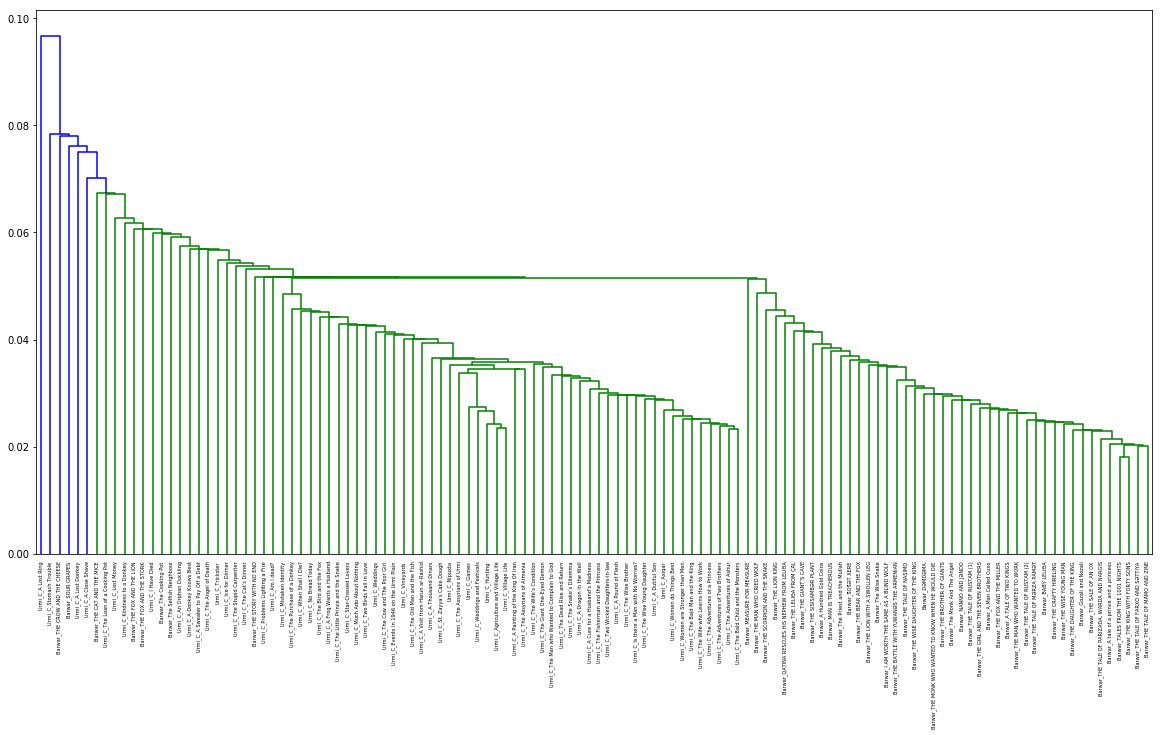

In [102]:
plt.figure(figsize=(20, 10))
dendrogram(links, labels=norm_bigrams.index)
plt.savefig('dialects.png', dpi=300, bbox_inches='tight')
plt.show()